<a href="https://colab.research.google.com/github/AndySCS/ZW02a-25_FYP_repo/blob/20251225_ffn_test/ffn_test/jpnb/FYP_MINST_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import pkgs
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#model def
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [3]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7978 - loss: 0.6612 - val_accuracy: 0.9452 - val_loss: 0.1882
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9247 - loss: 0.2552 - val_accuracy: 0.9578 - val_loss: 0.1449
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9407 - loss: 0.1974 - val_accuracy: 0.9632 - val_loss: 0.1210
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9461 - loss: 0.1783 - val_accuracy: 0.9682 - val_loss: 0.1120
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9538 - loss: 0.1566 - val_accuracy: 0.9703 - val_loss: 0.1015


In [7]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9668 - loss: 0.1060
Test accuracy: 0.9716


In [8]:
# Make predictions on the test data
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [9]:
# Plot training & validation accuracy values
def show_acc_history(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [10]:
# Plot training & validation loss values
def show_val_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')
  plt.show()

In [11]:
def show_history(history):
  show_acc_history(history)
  show_val_history(history)

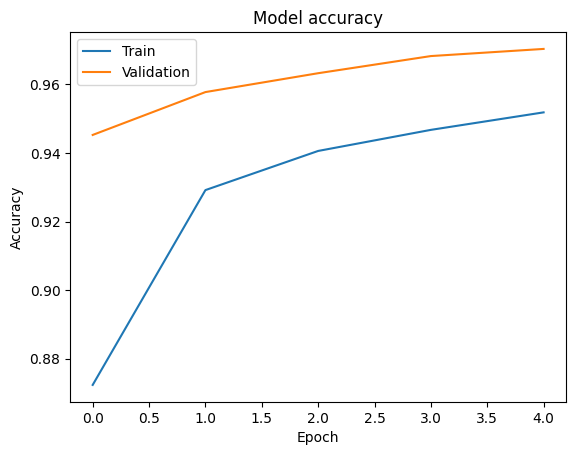

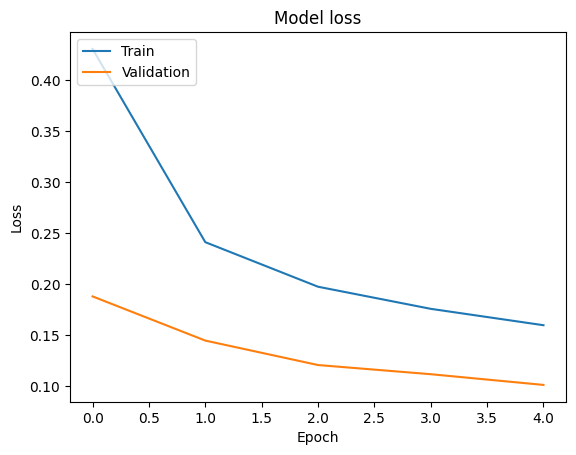

In [12]:
show_history(history)

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)

tflite_model = converter.convert()

Saved artifact at '/tmp/tmputhg4eww'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132943126494096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132943126493328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132943126495056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132943126494288: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [14]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(x_train.astype('float32')).batch(1).take(100):
    # Model has only one input so each data point has one element.
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant = converter.convert()

Saved artifact at '/tmp/tmpud3m_p9m'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  132943126494096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132943126493328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132943126495056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132943126494288: TensorSpec(shape=(), dtype=tf.resource, name=None)


/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


In [15]:
import pathlib

tflite_models_dir = pathlib.Path("/tmp/mnist_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)

# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"mnist_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_model_quant)

108136

In [16]:
# Helper function to run inference on a TFLite model
def run_tflite_model(tflite_file, test_image_indices, x_test, y_test):

  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    test_image = x_test[test_image_index]
    test_label = x_test[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions[i] = output.argmax()

  return predictions

In [17]:
# Helper function to evaluate a TFLite model on all images
def evaluate_model(tflite_file, model_type, x_test, y_test):

  test_image_indices = range(x_test.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices, x_test, y_test)

  accuracy = (np.sum(y_test== predictions) * 100) / len(x_test)

  print('%s model accuracy is %.4f%% (Number of test samples=%d)' % (
      model_type, accuracy, len(x_test)))

In [18]:
evaluate_model(tflite_model_quant_file, model_type="Quantized", x_test = x_test, y_test = y_test)

/usr/local/lib/python3.12/dist-packages/tensorflow/lite/python/interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Quantized model accuracy is 97.1700% (Number of test samples=10000)


In [19]:
import pandas as pd

In [20]:
pip install ai-edge-litert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 89.7 MB/s eta 0:00:00


In [21]:
from ai_edge_litert.interpreter import Interpreter


In [22]:

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path=str(tflite_model_quant_file))
interpreter.allocate_tensors()

# Get a list of all tensor details in the model
all_layers_details = interpreter.get_tensor_details()

model_weights = []

# Iterate through the details to identify and extract weight tensors
for tensor_details in all_layers_details:
    print(tensor_details['name'])
    # Check if the tensor contains weights (usually memory-mapped read-only)
    # The 'name' often indicates if it's a kernel (weights) or bias
    if "const" in tensor_details['name'] or "bias" in tensor_details['name']:
        tensor_index = tensor_details['index']
        # Get the actual data (weights) as a NumPy array
        weights = interpreter.get_tensor(tensor_index)
        print(f"Tensor Name: {tensor_details['name']}")
        print(f"Shape: {weights.shape}")
        model_weights.append(weights)
        print(f"Weights (first few values): {weights.flatten()[:5]}\n")

        # If the model is quantized, you can also access quantization parameters
        quant_params = tensor_details['quantization_parameters']

print(model_weights)
for weight in model_weights:
  print(weight.shape)


serving_default_keras_tensor:0
arith.constant
Tensor Name: arith.constant
Shape: (2,)
Weights (first few values): [ -1 784]

tfl.pseudo_qconst
Tensor Name: tfl.pseudo_qconst
Shape: (10,)
Weights (first few values): [ -187   -20 -1190 -2199   398]

tfl.pseudo_qconst1
Tensor Name: tfl.pseudo_qconst1
Shape: (10, 128)
Weights (first few values): [-50  23  29 -37  36]

tfl.pseudo_qconst2
Tensor Name: tfl.pseudo_qconst2
Shape: (128,)
Weights (first few values): [ 4831 -7276  -838  1228  1711]

tfl.pseudo_qconst3
Tensor Name: tfl.pseudo_qconst3
Shape: (128, 784)
Weights (first few values): [ 10  10   9 -12   6]

tfl.quantize
sequential_1/flatten_1/Reshape
sequential_1/dense_1/MatMul;sequential_1/dense_1/Relu;sequential_1/dense_1/BiasAdd
sequential_1/dense_1_2/MatMul;sequential_1/dense_1_2/BiasAdd
StatefulPartitionedCall_1:01
StatefulPartitionedCall_1:0
[array([ -1, 784], dtype=int32), array([ -187,   -20, -1190, -2199,   398,  -217,  -197,  -258,  2279,
        1038], dtype=int32), array([[ -